In [ ]:
import pandas as pd
import numpy as np

In [13]:
path ="/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv"
df =pd.read_csv(path)
df.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [14]:
data ="/content/drive/MyDrive/Colab Notebooks/historical_data.csv"
df1 = pd.read_csv(data)
df1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [15]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [16]:
df1['trade_date'] = df1['Timestamp IST'].dt.date
df['sentiment_date'] = df['date'].dt.date

In [17]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

In [18]:
df['sentiment_score'] = df['classification'].map(sentiment_map)

In [19]:
fear_greed_df = df[['sentiment_date','sentiment_score', 'classification']]
historical_data_df = df1[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]

In [20]:
fear_greed_df.head()

,sentiment_date,sentiment_score,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [21]:
historical_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


In [22]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [23]:
# checking the number of trades with and without sentiment data
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged_df.head()

Total Trades: 211224
Matched Sentiment: 211218
Unmatched Sentiment: 6


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [24]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file

In [25]:
# Trade level feature
merged_df['PnL_bin'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Zero'))
# PnL bin (profit/loss/zero)

In [27]:
# Convert 'Side' to binary values
merged_df['Side_Binary'] = merged_df['Side'].apply(lambda x : 1 if str(x).upper() == 'BUY' else 0)
# Trade Imapct (proxy for exposure)
merged_df['Trade_Imapct'] = merged_df['Size USD']
# Normalized PnL = PnL/Size USD (risk Adjusted return)
merged_df['Closed_PnL_Numeric'] = historical_data_df['Closed PnL']
merged_df['Normalized_PnL'] = merged_df.apply(
    lambda row : row['Closed_PnL_Numeric'] / row['Size USD'] if row['Size USD'] else 0, axis=1)

In [28]:
merged_df[['Account', 'trade_date', 'Side', 'Side_Binary', 'Size USD',
           'Closed PnL', 'PnL_bin', 'Trade_Imapct', 'Normalized_PnL','classification']].head()

,Account,trade_date,Side,Side_Binary,Size USD,Closed PnL,PnL_bin,Trade_Imapct,Normalized_PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,7872.16,0.0,Zero,7872.16,0.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,127.68,0.0,Zero,127.68,0.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1150.63,0.0,Zero,1150.63,0.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1142.04,0.0,Zero,1142.04,0.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,69.75,0.0,Zero,69.75,0.0,Extreme Greed


In [29]:
# Account_Level Daily Aggregation

daily_account_stats = merged_df.groupby(['Account', 'trade_date', 'classification', 'sentiment_score']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Side_Binary': 'mean',
    'PnL_bin': lambda x: (x == 'Profit').sum(),
    'Account': 'count'
}).reset_index()

daily_account_stats.columns = [
    'Account', 'trade_date', 'classification', 'sentiment_score',
    'Total_PnL', 'Avg_PnL',
    'Total_Trade_Size', 'Avg_Trade_Size',
    'Buy_Ratio',
    'Profit_Trades',
    'Total_Trades'
]

daily_account_stats['Profit_Rate'] = daily_account_stats['Profit_Trades'] / daily_account_stats['Total_Trades']
daily_account_stats.head()

,Account,trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.000000,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.000000,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.000000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,1.000000,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.444444,12,27,0.444444


/tmp/ipython-input-862176203.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')


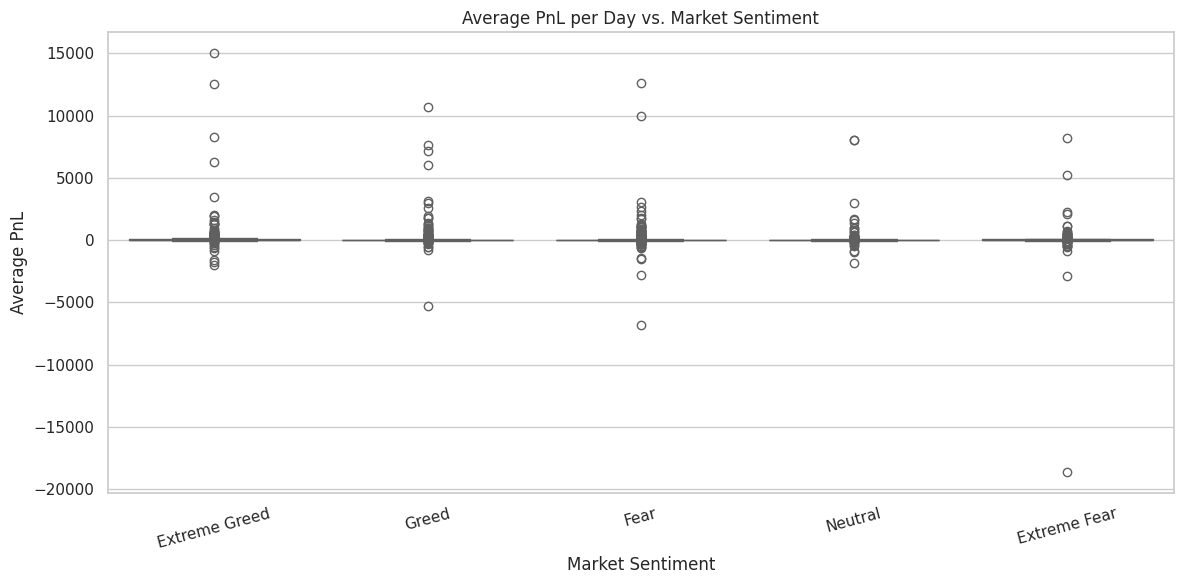

/tmp/ipython-input-862176203.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')


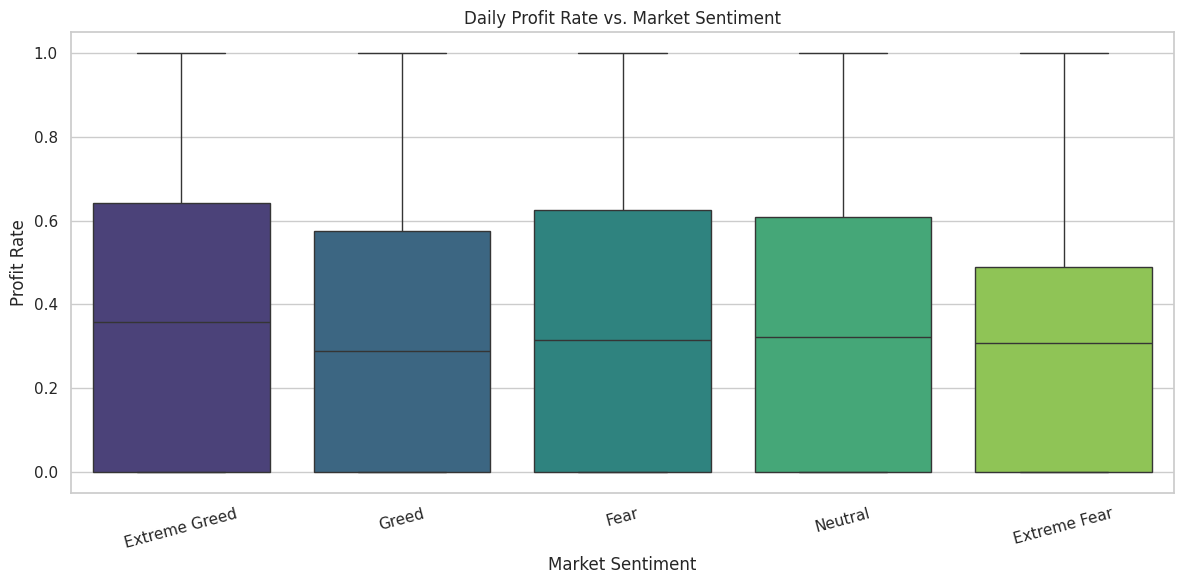

/tmp/ipython-input-862176203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')


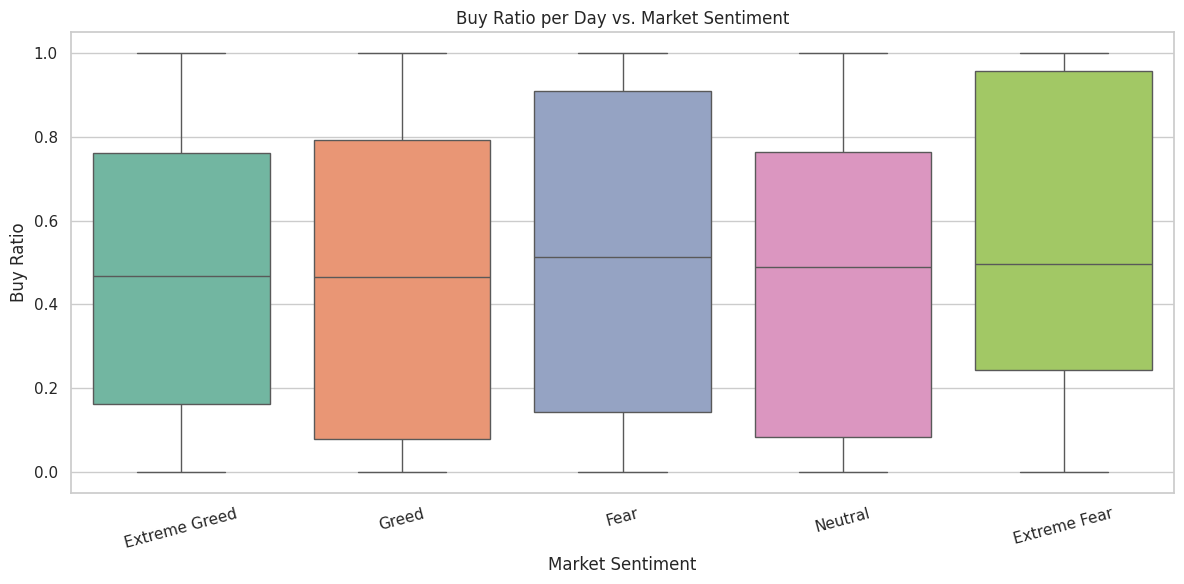

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plot 1: Average PnL per Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')
plt.title('Average PnL per Day vs. Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Profit Rate vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')
plt.title('Daily Profit Rate vs. Market Sentiment')
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 3: Buy Ratio vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')
plt.title('Buy Ratio per Day vs. Market Sentiment')
plt.ylabel('Buy Ratio')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()